In [24]:
import re
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [32]:
reddit_data = pd.read_pickle("/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/data/processed_reddit_data.df")

In [35]:
reddit_data.head()

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content,clean_title_content_stemmed,clean_title_content_lemmatized
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ...","[best, age, learn, second, languag, know, rese...","[best, age, learn, second, languag, know, rese..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr...","[zofran, pregnant, evid, base, data, zofran, r...","[zofran, pregnant, evid, base, data, zofran, r..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty...","[17-year, studi, children, associ, poverti, sm...","[17-year, studi, child, associ, poverti, small..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]","[10, kid, adhd, outgrow, studi, find]","[10, kid, adhd, outgrow, studi, find]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin...","[studi, show, differ, rapidli, process, sensor...","[studi, show, differ, rapidli, process, sensor..."


In [81]:
def remove_punct(text):
    punctuationfree= [i for i in text if i not in ["\'\'","``"]]
    return punctuationfree
#storing the puntuation free text
reddit_data['clean_title_content'] = reddit_data['clean_title_content'].apply(lambda x:remove_punct(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content,clean_title_content_stemmed,clean_title_content_lemmatized
0,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"['best', 'age', 'for', 'learning', 'a', 'secon...","['best', 'age', 'learning', 'second', 'languag...",None,"['best', 'age', 'learn', 'second', 'languag', ...","['best', 'age', 'learn', 'second', 'languag', ..."
1,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"['zofran', 'while', 'pregnant', '?', 'what', ""...","['zofran', 'pregnant', '?', 'evidence', 'based...",None,"['zofran', 'pregnant', 'evid', 'base', 'data',...","['zofran', 'pregnant', 'evid', 'base', 'data',..."
2,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"['17-year', 'study', 'of', 'children', 'associ...","['17-year', 'study', 'children', 'associates',...",None,"['17-year', 'studi', 'children', 'associ', 'po...","['17-year', 'studi', 'child', 'associ', 'pover..."
3,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","['just', '10', '%', 'of', 'kids', 'with', 'adh...","['10', '%', 'kids', 'adhd', 'outgrow', ',', 's...",None,"['10', 'kid', 'adhd', 'outgrow', 'studi', 'find']","['10', 'kid', 'adhd', 'outgrow', 'studi', 'find']"
4,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"['study', 'shows', 'differences', 'in', 'rapid...","['study', 'shows', 'differences', 'rapidly', '...",None,"['studi', 'show', 'differ', 'rapidli', 'proces...","['studi', 'show', 'differ', 'rapidli', 'proces..."


WordCloud Generation

In [36]:
from wordcloud import WordCloud
def wordcloud(x, color):
    plt.figure(figsize=(14, 10))
    wordcloud = WordCloud(width = 1000, height = 500,background_color = color).generate(" ".join(x))
    plt.imshow(wordcloud)
    plt.axis("off")
    return wordcloud

Building WordCloud after Stemming and Lemmatization

In [37]:
words_list = []
for i in reddit_data['clean_title_content']:
    for word in i:
        words_list.append(word)

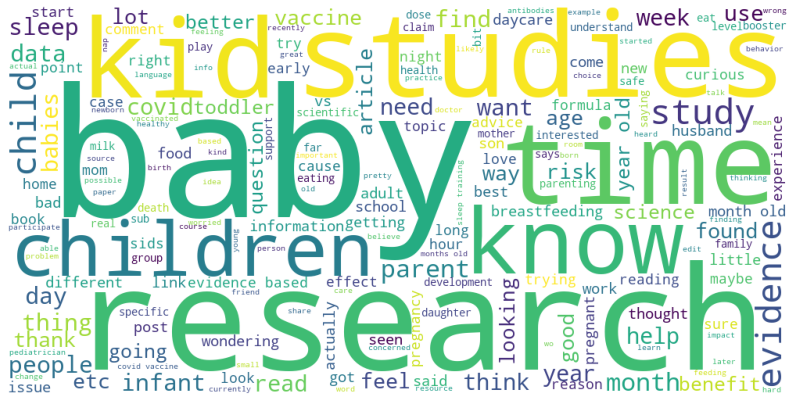

In [39]:
words = ' '.join(words_list)
all_words = words.split()
wordcloud(all_words, 'white')

Building WordCloud before Stemming and Lemmatization

In [40]:
words_list_1 = []
for i in reddit_data['clean_title_content']:
    for word in i:
        words_list_1.append(word)

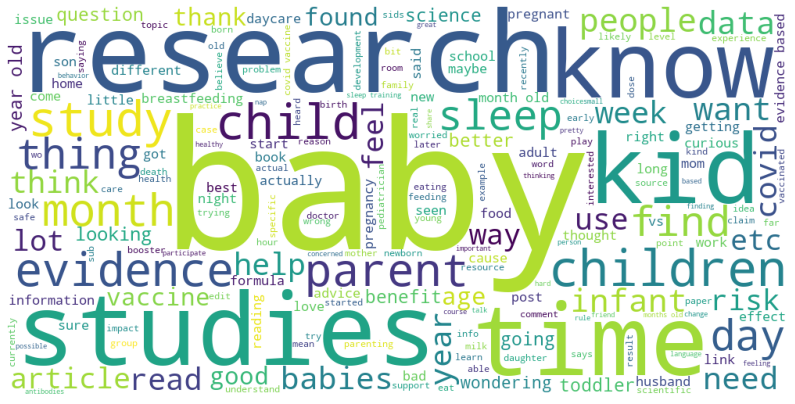

In [41]:
words_1 = ' '.join(words_list_1)
all_words_1 = words_1.split()
wordcloud(all_words_1, 'white')

Generating n-grams

In [42]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [43]:
words_1 = words_1.replace('austinthought.org/rnr','')
words_1 = words_1.replace('`','')
words_1 = words_1.replace("'",'')
words_1 = words_1.replace('  ',' ')

## BIGRAM ANALYSIS

In [44]:
word_count = defaultdict(int)
for word in generate_N_grams(words_1,2):
    word_count[word] += 1

In [45]:
df_word_count = pd.DataFrame(sorted(word_count.items(),key=lambda x:x[1],reverse=True))

Deleting an unnecessary string of punctuations

In [46]:
df_word_count.drop(df_word_count[(df_word_count[0] == "'' ``") | (df_word_count[0] == "`` ''")].index, inplace=True)

In [47]:
word=df_word_count[0][:100]
count=df_word_count[1][:100]

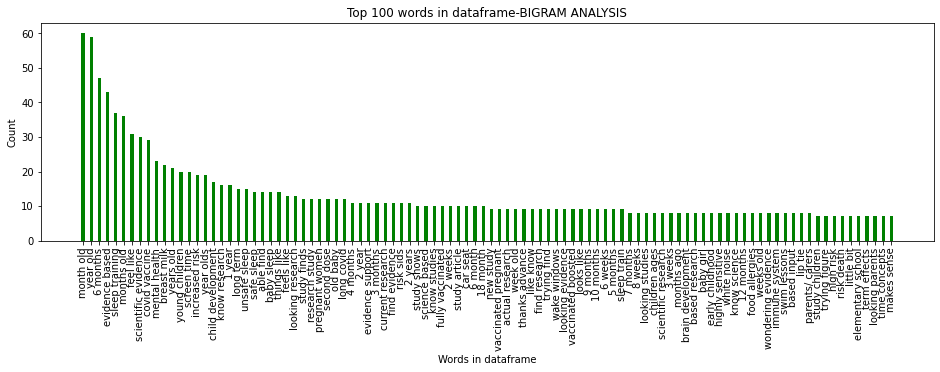

In [48]:
plt.figure(1,figsize=(16,4))
plt.bar(word,count, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 100 words in dataframe-BIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("bigram_analysis.png")
plt.show()

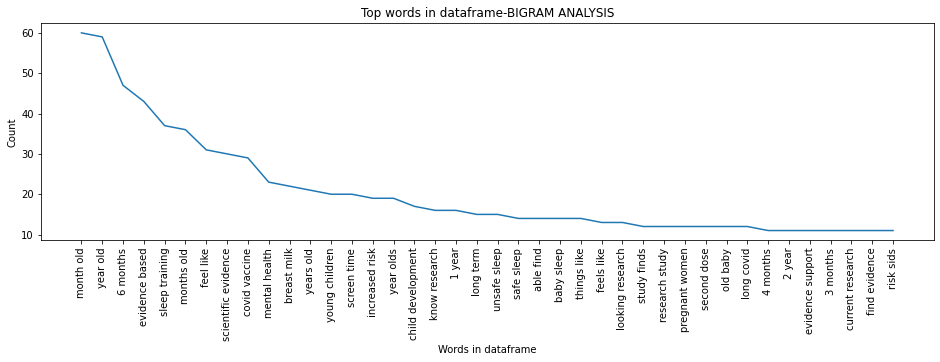

In [49]:
plt.figure(1,figsize=(16,4))
sns.lineplot( x = word[:40],
             y = count[:40])
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-BIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("bigram_analysis_lineplot.png")
plt.show()

__TRIGRAM ANALYSIS__

In [50]:
word_count = defaultdict(int)
for word in generate_N_grams(words_1,3):
    word_count[word] += 1

In [51]:
df_word_count = pd.DataFrame(sorted(word_count.items(),key=lambda x:x[1],reverse=True))

In [52]:
word=df_word_count[0][:100]
count=df_word_count[1][:100]

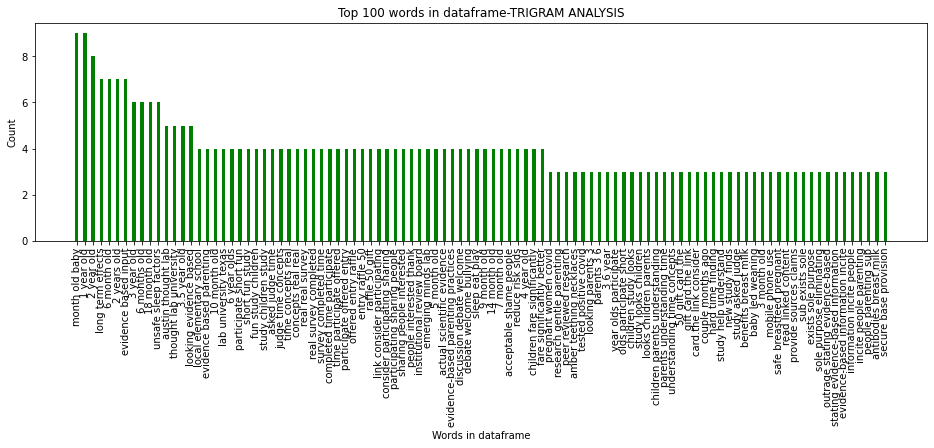

In [53]:
plt.figure(1,figsize=(16,4))
plt.bar(word,count, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 100 words in dataframe-TRIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("trigram_analysis.png")
plt.show()

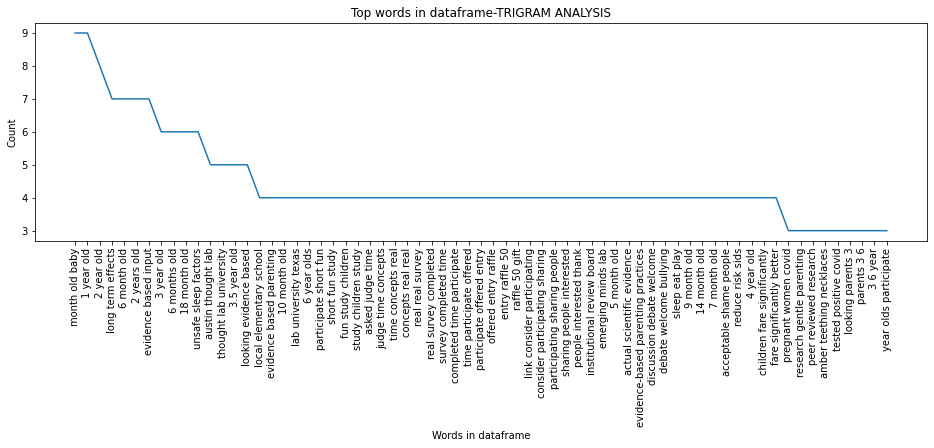

In [54]:
plt.figure(1,figsize=(16,4))
sns.lineplot( x = word[:67],
             y = count[:67])
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-TRIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("trigram_analysis_lineplot.png")
plt.show()